In [489]:
import polars as pl
import numpy as np

In [502]:
vendor_id = ['A', 'A', 'B', 'B', 'B']
passenger_count = [1, 1, 2, 2, 1]
trip_distance = [0.95, 1.2, 2.51, 2.9, 1.53]
payment_type = ['card', 'card', 'cash', 'cash', 'card']
total_amount = [14.3, 16.9, 34.6, 27.8, 15.2]

print(pl.DataFrame([vendor_id, passenger_count, trip_distance, payment_type, total_amount],
                  orient = 'col'))

shape: (5, 5)
┌──────────┬──────────┬──────────┬──────────┬──────────┐
│ column_0 ┆ column_1 ┆ column_2 ┆ column_3 ┆ column_4 │
│ ---      ┆ ---      ┆ ---      ┆ ---      ┆ ---      │
│ str      ┆ i64      ┆ f64      ┆ str      ┆ f64      │
╞══════════╪══════════╪══════════╪══════════╪══════════╡
│ A        ┆ 1        ┆ 0.95     ┆ card     ┆ 14.3     │
│ A        ┆ 1        ┆ 1.2      ┆ card     ┆ 16.9     │
│ B        ┆ 2        ┆ 2.51     ┆ cash     ┆ 34.6     │
│ B        ┆ 2        ┆ 2.9      ┆ cash     ┆ 27.8     │
│ B        ┆ 1        ┆ 1.53     ┆ card     ┆ 15.2     │
└──────────┴──────────┴──────────┴──────────┴──────────┘


In [858]:
pl_df = pl.DataFrame(
	[vendor_id, passenger_count, trip_distance, payment_type, total_amount],
	schema = ['vendor_id', 'passenger_count', 'trip_distance', 'payment_type', 'total_amount']
	)

In [859]:
print(pl_df)

shape: (5, 5)
┌───────────┬─────────────────┬───────────────┬──────────────┬──────────────┐
│ vendor_id ┆ passenger_count ┆ trip_distance ┆ payment_type ┆ total_amount │
│ ---       ┆ ---             ┆ ---           ┆ ---          ┆ ---          │
│ str       ┆ i64             ┆ f64           ┆ str          ┆ f64          │
╞═══════════╪═════════════════╪═══════════════╪══════════════╪══════════════╡
│ A         ┆ 1               ┆ 0.95          ┆ card         ┆ 14.3         │
│ A         ┆ 1               ┆ 1.2           ┆ card         ┆ 16.9         │
│ B         ┆ 2               ┆ 2.51          ┆ cash         ┆ 34.6         │
│ B         ┆ 2               ┆ 2.9           ┆ cash         ┆ 27.8         │
│ B         ┆ 1               ┆ 1.53          ┆ card         ┆ 15.2         │
└───────────┴─────────────────┴───────────────┴──────────────┴──────────────┘


In [517]:
pl_df = pl.DataFrame({
    "vendor_id": np.array(["A", "A", "B", "B", "B"]),
    "passenger_count": [1, 1, 2, 2, 1],
    "trip_distance": [0.95, 1.2, 2.51, 2.9, 1.53],
    "payment_type": ["card", "card", "cash", "cash", "card"],
    "total_amount": [14.3, 16.9, 34.6, 27.8, 15.2]
},
# schema = {
#     'vendor_id': pl.String,
#     'passenger_count': pl.Int64,
#     'trip_distance': pl.Float64,
#     'payment_type': pl.String,
#     'total_amount': pl.Float64
# },
schema = {
    'vendor_id':str,
    'passenger_count': int,
    'trip_distance': float,
    'payment_type': str,
    'total_amount': float
}

)
# 컬럼에 데이터 타입까지 한 번에 보여준다.

In [522]:
pl.col('vendor_id')

<Expr ['col("vendor_id")'] at 0x7FC8141C48B0>

In [531]:
type(pl_df['passenger_count'])

polars.series.series.Series

In [535]:
type(pl_df[['passenger_count']])

polars.dataframe.frame.DataFrame

In [533]:
type(pl_df)

polars.dataframe.frame.DataFrame

In [ ]:
# 파일 읽어서 가져오기

# csv
df_polars = pl.read_csv('file_path')

# parquet
df_polars = pl.read_parquet('file_path')

In [705]:
pl_df.select((pl.col('trip_distance') + pl.col('total_amount')).alias('calculate'))

calculate
f64
15.25
18.1
37.11
30.7
16.73


In [694]:
# 기본 연산
pl_df_calculation = pl_df.select(
                                    (pl.col('passenger_count') + 1).alias('with_driver'),
                                    # (pl['passenger_count'] +1).alais('with_driver'),
                                    (pl.col('trip_distance') - 1).alias('trip_distance - 1'),
                                    (pl.col('trip_distance') * 1.60934).alias('trip_distance_km'),
                                    ((pl.col('total_amount') / pl.col('trip_distance')).alias('total_amout / trip_distance'))
)
# (pl_df['passenger_count'] + 1).alias('with_driver')

TypeError: 'module' object is not subscriptable

In [34]:
# 논리 연산
pl_df_logical = pl_df.select(
                                (pl.col('passenger_count') > 1).alias('people'),
                                (pl.col('trip_distance') <= 1).alias('short_distance'),
                                (pl.col('payment_type') != 'cash').alias('not_cash'),
                                (pl.col('payment_type') == 'cash').alias('is_cash'),
                                (
                                    (pl.col('total_amount') <= 20)
                                    & (pl.col('payment_type') == 'card')
                                ).alias('cheap_card'),
                                (
                                    (pl.col('total_amount') > 20)
                                    | (pl.col('payment_type') == 'cash')
                                ).alias('expensive_or_cash')
)

In [695]:
pl_df_logical

people,short_distance,not_cash,is_cash,cheap_card,expensive_or_cash
bool,bool,bool,bool,bool,bool
false,true,true,false,true,false
false,false,true,false,true,false
true,false,false,true,false,true
true,false,false,true,false,true
false,false,true,false,true,false


In [41]:
# 열 선택 방법
display(pl_df[['vendor_id', 'passenger_count']])
display(pl_df.select(['vendor_id', 'passenger_count']))
display(pl_df.select(pl.col(['vendor_id', 'passenger_count'])))
display(pl_df.select(pl.col('vendor_id'), pl.col('passenger_count')))

VendorID,passenger_count
str,i64
"""A""",1
"""A""",1
"""B""",2
"""B""",2
"""B""",1


VendorID,passenger_count
str,i64
"""A""",1
"""A""",1
"""B""",2
"""B""",2
"""B""",1


VendorID,passenger_count
str,i64
"""A""",1
"""A""",1
"""B""",2
"""B""",2
"""B""",1


VendorID,passenger_count
str,i64
"""A""",1
"""A""",1
"""B""",2
"""B""",2
"""B""",1


In [ ]:
# 모든 열 선택
display(pl_df.select(pl.col('*')))
display(pl_df.select(pl.all()))

vendor_id,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",1,1.2,"""card""",16.9
"""B""",2,2.51,"""cash""",34.6
"""B""",2,2.9,"""cash""",27.8
"""B""",1,1.53,"""card""",15.2


vendor_id,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",1,1.2,"""card""",16.9
"""B""",2,2.51,"""cash""",34.6
"""B""",2,2.9,"""cash""",27.8
"""B""",1,1.53,"""card""",15.2


In [556]:
# 특정 열 제거
display(pl_df.select(pl.col('*').exclude('payment_type', 'total_amount')))
display(pl_df.select(pl.all().exclude(['payment_type', 'total_amount'])))
display(pl_df.drop(['payment_type', 'total_amount']))

vendor_id,passenger_count,trip_distance
str,i64,f64
"""A""",1,0.95
"""A""",1,1.2
"""B""",2,2.51
"""B""",2,2.9
"""B""",1,1.53


vendor_id,passenger_count,trip_distance
str,i64,f64
"""A""",1,0.95
"""A""",1,1.2
"""B""",2,2.51
"""B""",2,2.9
"""B""",1,1.53


vendor_id,passenger_count,trip_distance
str,i64,f64
"""A""",1,0.95
"""A""",1,1.2
"""B""",2,2.51
"""B""",2,2.9
"""B""",1,1.53


In [612]:
# 여러 컬럼에 메서드 적용하기
pl_df.select(pl.col('trip_distance', 'total_amount').gt(1))

trip_distance,total_amount
bool,bool
false,true
true,true
true,true
true,true
true,true


In [619]:
# 컬럼에 정규식을 조건으로 사용하기
pl_df.select(pl.col("^.*(unt)$"))

passenger_count,total_amount
i64,f64
1,14.3
1,16.9
2,34.6
2,27.8
1,15.2


In [623]:
pl_df.select(pl.col('^.*(amount|count)$'))

passenger_count,total_amount
i64,f64
1,14.3
1,16.9
2,34.6
2,27.8
1,15.2


In [76]:
# 데이터 타입으로 컬럼 선택하기 (pandas에서 select_dtypes 라는 메서드를 제공하고 있다.)
display(pl_df.select(pl.col(pl.Float64, pl.String)))
display(pl_df.select(pl.col(pl.Float64, pl.String).n_unique()))

VendorID,trip_distance,payment_type,total_amount
str,f64,str,f64
"""A""",0.95,"""card""",14.3
"""A""",1.2,"""card""",16.9
"""B""",2.51,"""cash""",34.6
"""B""",2.9,"""cash""",27.8
"""B""",1.53,"""card""",15.2


VendorID,trip_distance,payment_type,total_amount
u32,u32,u32,u32
2,5,2,5


In [89]:
# selector
import polars.selectors as cs

print(cs.integer())
print(cs.string())
print(cs.numeric())
print(cs.float())

display(pl_df.select(cs.integer(), cs.string()))

dtype_columns([Int16, UInt32, Int8, UInt16, UInt8, Int128, Int64, Int32, UInt64])
dtype_columns([String])
dtype_columns([Int16, UInt32, Int8, UInt16, UInt8, Int128, Float64, Int64, Float32, Int32, UInt64, Decimal(None, None)])
dtype_columns([Float32, Float64])


passenger_count,VendorID,payment_type
i64,str,str
1,"""A""","""card"""
1,"""A""","""card"""
2,"""B""","""cash"""
2,"""B""","""cash"""
1,"""B""","""card"""


In [649]:
# 결측 값 확인하기
pl_null_df = pl.DataFrame({
    "vendor_id": ["A", "A", "B", None, "B"],
    "passenger_count": [1, None, None, 2, 1],
    "trip_distance": [0.95, 1.2, None, 2.9, 1.53],
    "payment_type": ["card", "card", None, None, "card"],
    "total_amount": [14.3, 16.9, None, 27.8, 15.2]
})

pd_null_df = pd.DataFrame({
    "vendor_id": ["A", "A", "B", None, "B"],
    "passenger_count": [1, None, None, 2, 1],
    "trip_distance": [0.95, 1.2, None, 2.9, 1.53],
    "payment_type": ["card", "card", None, None, "card"],
    "total_amount": [14.3, 16.9, None, 27.8, 15.2]
})

In [650]:
print(pl_null_df.null_count()) # isnull().sum()

shape: (1, 5)
┌───────────┬─────────────────┬───────────────┬──────────────┬──────────────┐
│ vendor_id ┆ passenger_count ┆ trip_distance ┆ payment_type ┆ total_amount │
│ ---       ┆ ---             ┆ ---           ┆ ---          ┆ ---          │
│ u32       ┆ u32             ┆ u32           ┆ u32          ┆ u32          │
╞═══════════╪═════════════════╪═══════════════╪══════════════╪══════════════╡
│ 1         ┆ 2               ┆ 1             ┆ 2            ┆ 1            │
└───────────┴─────────────────┴───────────────┴──────────────┴──────────────┘


In [656]:
print(pl_null_df.select(pl.col('*').is_null()).sum())

shape: (1, 5)
┌───────────┬─────────────────┬───────────────┬──────────────┬──────────────┐
│ vendor_id ┆ passenger_count ┆ trip_distance ┆ payment_type ┆ total_amount │
│ ---       ┆ ---             ┆ ---           ┆ ---          ┆ ---          │
│ u32       ┆ u32             ┆ u32           ┆ u32          ┆ u32          │
╞═══════════╪═════════════════╪═══════════════╪══════════════╪══════════════╡
│ 1         ┆ 2               ┆ 1             ┆ 2            ┆ 1            │
└───────────┴─────────────────┴───────────────┴──────────────┴──────────────┘


In [657]:
print(pl_null_df.select(pl.col('*').is_null()))

shape: (5, 5)
┌───────────┬─────────────────┬───────────────┬──────────────┬──────────────┐
│ vendor_id ┆ passenger_count ┆ trip_distance ┆ payment_type ┆ total_amount │
│ ---       ┆ ---             ┆ ---           ┆ ---          ┆ ---          │
│ bool      ┆ bool            ┆ bool          ┆ bool         ┆ bool         │
╞═══════════╪═════════════════╪═══════════════╪══════════════╪══════════════╡
│ false     ┆ false           ┆ false         ┆ false        ┆ false        │
│ false     ┆ true            ┆ false         ┆ false        ┆ false        │
│ false     ┆ true            ┆ true          ┆ true         ┆ true         │
│ true      ┆ false           ┆ false         ┆ true         ┆ false        │
│ false     ┆ false           ┆ false         ┆ false        ┆ false        │
└───────────┴─────────────────┴───────────────┴──────────────┴──────────────┘


In [ ]:
pd_null_df.drop_nans(subset = [])
pd_null_df.drop_nulls(subset = [])

In [667]:
pl_null_df.with_columns(pl.col('passenger_count').fill_null(999).alias('passenger_count_fill_null'))

vendor_id,passenger_count,trip_distance,payment_type,total_amount,passenger_count_fill_null
str,i64,f64,str,f64,i64
"""A""",1,0.95,"""card""",14.3,1
"""A""",null,1.2,"""card""",16.9,999
"""B""",null,null,null,null,999
null,2,2.9,null,27.8,2
"""B""",1,1.53,"""card""",15.2,1


In [685]:
pl_null_df

vendor_id,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",null,1.2,"""card""",16.9
"""B""",null,null,null,null
null,2,2.9,null,27.8
"""B""",1,1.53,"""card""",15.2


In [686]:
print(pl_null_df.fill_null(2)) # 입력한 값의 데이터 타입에 대응하는 컬럼의 null 값만 채운다.

shape: (5, 5)
┌───────────┬─────────────────┬───────────────┬──────────────┬──────────────┐
│ vendor_id ┆ passenger_count ┆ trip_distance ┆ payment_type ┆ total_amount │
│ ---       ┆ ---             ┆ ---           ┆ ---          ┆ ---          │
│ str       ┆ i64             ┆ f64           ┆ str          ┆ f64          │
╞═══════════╪═════════════════╪═══════════════╪══════════════╪══════════════╡
│ A         ┆ 1               ┆ 0.95          ┆ card         ┆ 14.3         │
│ A         ┆ 2               ┆ 1.2           ┆ card         ┆ 16.9         │
│ B         ┆ 2               ┆ 2.0           ┆ null         ┆ 2.0          │
│ null      ┆ 2               ┆ 2.9           ┆ null         ┆ 27.8         │
│ B         ┆ 1               ┆ 1.53          ┆ card         ┆ 15.2         │
└───────────┴─────────────────┴───────────────┴──────────────┴──────────────┘


In [687]:
print(pl_null_df.fill_null(pl.lit(2))) # 해당 컬럼에 맞는 형태로 변형하여 null 값을 채운다.

shape: (5, 5)
┌───────────┬─────────────────┬───────────────┬──────────────┬──────────────┐
│ vendor_id ┆ passenger_count ┆ trip_distance ┆ payment_type ┆ total_amount │
│ ---       ┆ ---             ┆ ---           ┆ ---          ┆ ---          │
│ str       ┆ i64             ┆ f64           ┆ str          ┆ f64          │
╞═══════════╪═════════════════╪═══════════════╪══════════════╪══════════════╡
│ A         ┆ 1               ┆ 0.95          ┆ card         ┆ 14.3         │
│ A         ┆ 2               ┆ 1.2           ┆ card         ┆ 16.9         │
│ B         ┆ 2               ┆ 2.0           ┆ 2            ┆ 2.0          │
│ 2         ┆ 2               ┆ 2.9           ┆ 2            ┆ 27.8         │
│ B         ┆ 1               ┆ 1.53          ┆ card         ┆ 15.2         │
└───────────┴─────────────────┴───────────────┴──────────────┴──────────────┘


In [671]:
pl_null_df.fill_null(2)

vendor_id,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",2,1.2,"""card""",16.9
"""B""",2,2.0,null,2.0
null,2,2.9,null,27.8
"""B""",1,1.53,"""card""",15.2


In [673]:
pl_null_df.fill_null(pl.lit(2))

vendor_id,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",2,1.2,"""card""",16.9
"""B""",2,2.0,"""2""",2.0
"""2""",2,2.9,"""2""",27.8
"""B""",1,1.53,"""card""",15.2


In [688]:
pl_null_df.select(pl.col('*').fill_null(2))

vendor_id,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",2,1.2,"""card""",16.9
"""B""",2,2.0,"""2""",2.0
"""2""",2,2.9,"""2""",27.8
"""B""",1,1.53,"""card""",15.2


In [668]:
# with_columns ? >>> 컬럼을 추가하는 메서드, but! 컬럼명을 지정해주지 않고, 진행할 경우 새로운 컬럼이 생기는 것이 아니라 기존의 컬럼 값이 변경된다(기존 컬럼을 활용한 경우).
pl_null_df.select(pl.col('*').fill_null(2))

vendor_id,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",2,1.2,"""card""",16.9
"""B""",2,2.0,"""2""",2.0
"""2""",2,2.9,"""2""",27.8
"""B""",1,1.53,"""card""",15.2


In [141]:
pl_null_df.with_columns(a = 1, b = 2)

VendorID,passenger_count,trip_distance,payment_type,total_amount,a,b
str,i64,f64,str,f64,i32,i32
"""A""",1,0.95,"""card""",14.3,1,2
"""A""",null,1.2,"""card""",16.9,1,2
"""B""",null,null,null,null,1,2
null,2,2.9,null,27.8,1,2
"""B""",1,1.53,"""card""",15.2,1,2


In [150]:
# alias 메서드를 통해 컬러명 지정 가능
# cast 메서드를 통해 데이터 타입 지정 가능
pl_null_df.with_columns((pl.col('trip_distance') * pl.col('total_amount')).alias('test').cast(int))

VendorID,passenger_count,trip_distance,payment_type,total_amount,test
str,i64,f64,str,f64,i64
"""A""",1,0.95,"""card""",14.3,13
"""A""",null,1.2,"""card""",16.9,20
"""B""",null,null,null,null,null
null,2,2.9,null,27.8,80
"""B""",1,1.53,"""card""",15.2,23


In [ ]:
pl_null_df.fill_null(strategy = 'forward')

vendor_id,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",1,1.2,"""card""",16.9
"""B""",1,1.2,"""card""",16.9
"""B""",2,2.9,"""card""",27.8
"""B""",1,1.53,"""card""",15.2


In [153]:
# Strategy를 이용한 결측값 채우기 - strategy = 'forward', 'backward', 'min', 'max', 'mean', 'zero', 'one'
display(pl_null_df.with_columns(pl.col('*').fill_null(strategy = 'forward')))
display(pl_null_df.with_columns(pl.col('*').fill_null(strategy = 'backward')))

VendorID,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",1,1.2,"""card""",16.9
"""B""",1,1.2,"""card""",16.9
"""B""",2,2.9,"""card""",27.8
"""B""",1,1.53,"""card""",15.2


VendorID,passenger_count,trip_distance,payment_type,total_amount
str,i64,f64,str,f64
"""A""",1,0.95,"""card""",14.3
"""A""",2,1.2,"""card""",16.9
"""B""",2,2.9,"""card""",27.8
"""B""",2,2.9,"""card""",27.8
"""B""",1,1.53,"""card""",15.2


In [682]:
pl_null_df.fill_null(pl.col('*').median(['passenger_count', 'trip_distance', 'total_amount']))

TypeError: median() takes 1 positional argument but 2 were given

In [684]:
pl_null_df.select(pl.col(['passenger_count', 'trip_distance', 'total_amount']).fill_null(pl.median(['passenger_count', 'trip_distance', 'total_amount'])))

passenger_count,trip_distance,total_amount
f64,f64,f64
1.0,0.95,14.3
1.0,1.2,16.9
1.0,1.365,16.05
2.0,2.9,27.8
1.0,1.53,15.2


In [155]:
pl_null_df.with_columns(pl.col(['passenger_count', 'trip_distance', 'total_amount']).fill_null(pl.median(['passenger_count', 'trip_distance', 'total_amount'])))

VendorID,passenger_count,trip_distance,payment_type,total_amount
str,f64,f64,str,f64
"""A""",1.0,0.95,"""card""",14.3
"""A""",1.0,1.2,"""card""",16.9
"""B""",1.0,1.365,null,16.05
null,2.0,2.9,null,27.8
"""B""",1.0,1.53,"""card""",15.2


In [162]:
pl_null_df.with_columns(pl.col(['passenger_count', 'trip_distance', 'total_amount']).interpolate())

VendorID,passenger_count,trip_distance,payment_type,total_amount
str,f64,f64,str,f64
"""A""",1.0,0.95,"""card""",14.3
"""A""",1.333333,1.2,"""card""",16.9
"""B""",1.666667,2.05,null,22.35
null,2.0,2.9,null,27.8
"""B""",1.0,1.53,"""card""",15.2


In [727]:
print(pl_df.with_columns())

shape: (5, 5)
┌───────────┬─────────────────┬───────────────┬──────────────┬──────────────┐
│ vendor_id ┆ passenger_count ┆ trip_distance ┆ payment_type ┆ total_amount │
│ ---       ┆ ---             ┆ ---           ┆ ---          ┆ ---          │
│ str       ┆ i64             ┆ f64           ┆ str          ┆ f64          │
╞═══════════╪═════════════════╪═══════════════╪══════════════╪══════════════╡
│ A         ┆ 1               ┆ 0.95          ┆ card         ┆ 14.3         │
│ A         ┆ 1               ┆ 1.2           ┆ card         ┆ 16.9         │
│ B         ┆ 2               ┆ 2.51          ┆ cash         ┆ 34.6         │
│ B         ┆ 2               ┆ 2.9           ┆ cash         ┆ 27.8         │
│ B         ┆ 1               ┆ 1.53          ┆ card         ┆ 15.2         │
└───────────┴─────────────────┴───────────────┴──────────────┴──────────────┘


In [739]:
print(pl_df.with_columns(
                    (pl.col('passenger_count')+1),
                    (pl.col('passenger_count').alias('passenger_count_org')),
                    (pl.col('passenger_count')+1).alias('passenger_count+1'),
                    passenger_count_plus_1 = (pl.col('passenger_count')+1)
))

shape: (5, 8)
┌───────────┬────────────┬────────────┬────────────┬───────────┬───────────┬───────────┬───────────┐
│ vendor_id ┆ passenger_ ┆ trip_dista ┆ payment_ty ┆ total_amo ┆ passenger ┆ passenger ┆ passenger │
│ ---       ┆ count      ┆ nce        ┆ pe         ┆ unt       ┆ _count_or ┆ _count+1  ┆ _count_pl │
│ str       ┆ ---        ┆ ---        ┆ ---        ┆ ---       ┆ g         ┆ ---       ┆ us_1      │
│           ┆ i64        ┆ f64        ┆ str        ┆ f64       ┆ ---       ┆ i64       ┆ ---       │
│           ┆            ┆            ┆            ┆           ┆ i64       ┆           ┆ i64       │
╞═══════════╪════════════╪════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ A         ┆ 2          ┆ 0.95       ┆ card       ┆ 14.3      ┆ 1         ┆ 2         ┆ 2         │
│ A         ┆ 2          ┆ 1.2        ┆ card       ┆ 16.9      ┆ 1         ┆ 2         ┆ 2         │
│ B         ┆ 3          ┆ 2.51       ┆ cash       ┆ 34.6      ┆ 2         ┆ 

In [750]:
pl_df.with_columns(
                    pl.col('total_amount').shift(fill_value=0).alias('total_amount_shift'),
                    pl.col('total_amount').diff(n = 1).alias('total_amount_diff'),
                    
)

vendor_id,passenger_count,trip_distance,payment_type,total_amount,total_amount_shift,total_amount_diff
str,i64,f64,str,f64,f64,f64
"""A""",1,0.95,"""card""",14.3,0.0,null
"""A""",1,1.2,"""card""",16.9,14.3,2.6
"""B""",2,2.51,"""cash""",34.6,16.9,17.7
"""B""",2,2.9,"""cash""",27.8,34.6,-6.8
"""B""",1,1.53,"""card""",15.2,27.8,-12.6


In [166]:
# join
# pandas
pd_menu = pd.DataFrame(
    {
        "item": ["coffee", "latte", "ade", "cake", "bread", "chocolate"],
        "type": ["beverage", "beverage", "beverage", "dessert", "dessert", "dessert"],
        "price": [3000, 4000, 5000, 6000, 7500, 4500]
    }
)

pd_orders = pd.DataFrame(
    {
        "item": ["coffee", "ade", "coffee", "cake", "chocolate"],
        "number_of_orders": [1, 3, 7, 2, 5]
    }
)

# polars
menu = pl.from_pandas(pd_menu)
orders = pl.from_pandas(pd_orders)

In [755]:
menu = pl.DataFrame(
    {
        "item": ["coffee", "latte", "ade", "cake", "bread", "chocolate"],
        "type": ["beverage", "beverage", "beverage", "dessert", "dessert", "dessert"],
        "price": [3000, 4000, 5000, 6000, 7500, 4500]
    }
)

orders = pl.DataFrame(
    {
        "item": ["coffee", "ade", "coffee", "cake", "chocolate"],
        "number_of_orders": [1, 3, 7, 2, 5]
    }
)

In [757]:
print(menu), print(orders)

shape: (6, 3)
┌───────────┬──────────┬───────┐
│ item      ┆ type     ┆ price │
│ ---       ┆ ---      ┆ ---   │
│ str       ┆ str      ┆ i64   │
╞═══════════╪══════════╪═══════╡
│ coffee    ┆ beverage ┆ 3000  │
│ latte     ┆ beverage ┆ 4000  │
│ ade       ┆ beverage ┆ 5000  │
│ cake      ┆ dessert  ┆ 6000  │
│ bread     ┆ dessert  ┆ 7500  │
│ chocolate ┆ dessert  ┆ 4500  │
└───────────┴──────────┴───────┘
shape: (5, 2)
┌───────────┬──────────────────┐
│ item      ┆ number_of_orders │
│ ---       ┆ ---              │
│ str       ┆ i64              │
╞═══════════╪══════════════════╡
│ coffee    ┆ 1                │
│ ade       ┆ 3                │
│ coffee    ┆ 7                │
│ cake      ┆ 2                │
│ chocolate ┆ 5                │
└───────────┴──────────────────┘


(None, None)

In [175]:
menu.join(orders,
          on = ['item'],
          how = 'inner')

item,type,price,number_of_orders
str,str,i64,i64
"""coffee""","""beverage""",3000,1
"""coffee""","""beverage""",3000,7
"""ade""","""beverage""",5000,3
"""cake""","""dessert""",6000,2
"""chocolate""","""dessert""",4500,5


In [226]:
menu.join(orders,
          on = ['item'],
          how = 'left')

item,type,price,number_of_orders
str,str,i64,i64
"""coffee""","""beverage""",3000,1
"""coffee""","""beverage""",3000,7
"""latte""","""beverage""",4000,null
"""ade""","""beverage""",5000,3
"""cake""","""dessert""",6000,2
"""bread""","""dessert""",7500,null
"""chocolate""","""dessert""",4500,5


In [227]:
menu.join(orders,
          on = ['item'],
          how = 'right')

type,price,item,number_of_orders
str,i64,str,i64
"""beverage""",3000,"""coffee""",1
"""beverage""",5000,"""ade""",3
"""beverage""",3000,"""coffee""",7
"""dessert""",6000,"""cake""",2
"""dessert""",4500,"""chocolate""",5


In [177]:
menu.join(orders,
          on = ['item'],
          how = 'full')

item,type,price,item_right,number_of_orders
str,str,i64,str,i64
"""coffee""","""beverage""",3000,"""coffee""",1
"""coffee""","""beverage""",3000,"""coffee""",7
"""latte""","""beverage""",4000,null,null
"""ade""","""beverage""",5000,"""ade""",3
"""cake""","""dessert""",6000,"""cake""",2
"""bread""","""dessert""",7500,null,null
"""chocolate""","""dessert""",4500,"""chocolate""",5


In [760]:
menu.join(orders,
          on = ['item'],
          how = 'full',
          coalesce = True)

item,type,price,number_of_orders
str,str,i64,i64
"""coffee""","""beverage""",3000,1
"""coffee""","""beverage""",3000,7
"""latte""","""beverage""",4000,null
"""ade""","""beverage""",5000,3
"""cake""","""dessert""",6000,2
"""bread""","""dessert""",7500,null
"""chocolate""","""dessert""",4500,5


In [761]:
menu.join(orders,
          on = ['item'],
          how = 'full',
          coalesce = False)

item,type,price,item_right,number_of_orders
str,str,i64,str,i64
"""coffee""","""beverage""",3000,"""coffee""",1
"""coffee""","""beverage""",3000,"""coffee""",7
"""latte""","""beverage""",4000,null,null
"""ade""","""beverage""",5000,"""ade""",3
"""cake""","""dessert""",6000,"""cake""",2
"""bread""","""dessert""",7500,null,null
"""chocolate""","""dessert""",4500,"""chocolate""",5


In [768]:
print(menu.join(orders,
          on = ['item'],
          how = 'full',
          coalesce = None))

shape: (7, 5)
┌───────────┬──────────┬───────┬────────────┬──────────────────┐
│ item      ┆ type     ┆ price ┆ item_right ┆ number_of_orders │
│ ---       ┆ ---      ┆ ---   ┆ ---        ┆ ---              │
│ str       ┆ str      ┆ i64   ┆ str        ┆ i64              │
╞═══════════╪══════════╪═══════╪════════════╪══════════════════╡
│ coffee    ┆ beverage ┆ 3000  ┆ coffee     ┆ 1                │
│ coffee    ┆ beverage ┆ 3000  ┆ coffee     ┆ 7                │
│ latte     ┆ beverage ┆ 4000  ┆ null       ┆ null             │
│ ade       ┆ beverage ┆ 5000  ┆ ade        ┆ 3                │
│ cake      ┆ dessert  ┆ 6000  ┆ cake       ┆ 2                │
│ bread     ┆ dessert  ┆ 7500  ┆ null       ┆ null             │
│ chocolate ┆ dessert  ┆ 4500  ┆ chocolate  ┆ 5                │
└───────────┴──────────┴───────┴────────────┴──────────────────┘


In [774]:
print(menu.join(orders,
          on = ['item'],
          how = 'left',
          coalesce = None))

shape: (7, 4)
┌───────────┬──────────┬───────┬──────────────────┐
│ item      ┆ type     ┆ price ┆ number_of_orders │
│ ---       ┆ ---      ┆ ---   ┆ ---              │
│ str       ┆ str      ┆ i64   ┆ i64              │
╞═══════════╪══════════╪═══════╪══════════════════╡
│ coffee    ┆ beverage ┆ 3000  ┆ 1                │
│ coffee    ┆ beverage ┆ 3000  ┆ 7                │
│ latte     ┆ beverage ┆ 4000  ┆ null             │
│ ade       ┆ beverage ┆ 5000  ┆ 3                │
│ cake      ┆ dessert  ┆ 6000  ┆ 2                │
│ bread     ┆ dessert  ┆ 7500  ┆ null             │
│ chocolate ┆ dessert  ┆ 4500  ┆ 5                │
└───────────┴──────────┴───────┴──────────────────┘


In [759]:
print(menu)
print(orders)

shape: (6, 3)
┌───────────┬──────────┬───────┐
│ item      ┆ type     ┆ price │
│ ---       ┆ ---      ┆ ---   │
│ str       ┆ str      ┆ i64   │
╞═══════════╪══════════╪═══════╡
│ coffee    ┆ beverage ┆ 3000  │
│ latte     ┆ beverage ┆ 4000  │
│ ade       ┆ beverage ┆ 5000  │
│ cake      ┆ dessert  ┆ 6000  │
│ bread     ┆ dessert  ┆ 7500  │
│ chocolate ┆ dessert  ┆ 4500  │
└───────────┴──────────┴───────┘
shape: (5, 2)
┌───────────┬──────────────────┐
│ item      ┆ number_of_orders │
│ ---       ┆ ---              │
│ str       ┆ i64              │
╞═══════════╪══════════════════╡
│ coffee    ┆ 1                │
│ ade       ┆ 3                │
│ coffee    ┆ 7                │
│ cake      ┆ 2                │
│ chocolate ┆ 5                │
└───────────┴──────────────────┘


In [785]:
print(menu.join(orders,
          on = ['item'],
          how = 'semi'))

# pd_menu.loc[pd_menu['item'].isin(pd_orders['item'])]

shape: (4, 3)
┌───────────┬──────────┬───────┐
│ item      ┆ type     ┆ price │
│ ---       ┆ ---      ┆ ---   │
│ str       ┆ str      ┆ i64   │
╞═══════════╪══════════╪═══════╡
│ coffee    ┆ beverage ┆ 3000  │
│ ade       ┆ beverage ┆ 5000  │
│ cake      ┆ dessert  ┆ 6000  │
│ chocolate ┆ dessert  ┆ 4500  │
└───────────┴──────────┴───────┘


In [796]:
menu.filter(~pl.col('item').is_in(orders.select(pl.col(['item']))))

item,type,price
str,str,i64
"""latte""","""beverage""",4000
"""bread""","""dessert""",7500


In [783]:
print(menu.join(orders,
          on = ['item'],
          how = 'anti'))

# pd_menu.loc[~pd_menu['item'].isin(pd_orders['item'])]

shape: (2, 3)
┌───────┬──────────┬───────┐
│ item  ┆ type     ┆ price │
│ ---   ┆ ---      ┆ ---   │
│ str   ┆ str      ┆ i64   │
╞═══════╪══════════╪═══════╡
│ latte ┆ beverage ┆ 4000  │
│ bread ┆ dessert  ┆ 7500  │
└───────┴──────────┴───────┘


In [799]:
menu.group_by('type').mean().select(pl.col(['type', 'price']))

type,price
str,f64
"""dessert""",6000.0
"""beverage""",4000.0


In [808]:
print(menu.group_by('type').sum())

shape: (2, 3)
┌──────────┬──────┬───────┐
│ type     ┆ item ┆ price │
│ ---      ┆ ---  ┆ ---   │
│ str      ┆ str  ┆ i64   │
╞══════════╪══════╪═══════╡
│ beverage ┆ null ┆ 12000 │
│ dessert  ┆ null ┆ 18000 │
└──────────┴──────┴───────┘


In [811]:
# 그룹 연산 메서드
# count(=len), n_unique, max, min, mean, median, quantile(n), sum
# first, head, last, tail
print(menu.select('type', 'price').group_by('type').mean())
print(menu.select('type', 'price').group_by('type').max())
print(menu.select('type', 'price').group_by('type').head(3))

shape: (2, 2)
┌──────────┬────────┐
│ type     ┆ price  │
│ ---      ┆ ---    │
│ str      ┆ f64    │
╞══════════╪════════╡
│ beverage ┆ 4000.0 │
│ dessert  ┆ 6000.0 │
└──────────┴────────┘
shape: (2, 2)
┌──────────┬───────┐
│ type     ┆ price │
│ ---      ┆ ---   │
│ str      ┆ i64   │
╞══════════╪═══════╡
│ dessert  ┆ 7500  │
│ beverage ┆ 5000  │
└──────────┴───────┘
shape: (6, 2)
┌──────────┬───────┐
│ type     ┆ price │
│ ---      ┆ ---   │
│ str      ┆ i64   │
╞══════════╪═══════╡
│ dessert  ┆ 6000  │
│ dessert  ┆ 7500  │
│ dessert  ┆ 4500  │
│ beverage ┆ 3000  │
│ beverage ┆ 4000  │
│ beverage ┆ 5000  │
└──────────┴───────┘


In [810]:
print(menu.select('type', 'price').group_by('type').first())
print(menu.select('type', 'price').group_by('type').head(1))

shape: (2, 2)
┌──────────┬───────┐
│ type     ┆ price │
│ ---      ┆ ---   │
│ str      ┆ i64   │
╞══════════╪═══════╡
│ beverage ┆ 3000  │
│ dessert  ┆ 6000  │
└──────────┴───────┘
shape: (2, 2)
┌──────────┬───────┐
│ type     ┆ price │
│ ---      ┆ ---   │
│ str      ┆ i64   │
╞══════════╪═══════╡
│ beverage ┆ 3000  │
│ dessert  ┆ 6000  │
└──────────┴───────┘


In [814]:
# agg 메서드
# agg_groups, arg_max, arg_min
# count(null 제외), len(null 포함), first, last, max, min, mean, median, quantile(n), sum, std, var, implode, product, nan_max, nan_min
print(menu.join(orders,
          on = ['item'],
          how = 'left').group_by(['type']).agg(
                                                pl.col('number_of_orders').fill_null(0).sum().alias('total_orders'),
                                                # pl.col('number_of_orders').fill_null(0).mean().alias('mean_orders')
    mean_orders = pl.col('number_of_orders').fill_null(0).mean()
))

shape: (2, 3)
┌──────────┬──────────────┬─────────────┐
│ type     ┆ total_orders ┆ mean_orders │
│ ---      ┆ ---          ┆ ---         │
│ str      ┆ i64          ┆ f64         │
╞══════════╪══════════════╪═════════════╡
│ beverage ┆ 11           ┆ 2.75        │
│ dessert  ┆ 7            ┆ 2.333333    │
└──────────┴──────────────┴─────────────┘


In [236]:
menu.join(orders,
          on = ['item'],
          how = 'left').group_by(['type']).agg(
                                                pl.col('number_of_orders').fill_null(0).sum().alias('total_orders'),
                                                pl.col('number_of_orders').fill_null(0).mean().alias('mean_orders')
        ).filter(
                    pl.col('total_orders') > 10
).select('type', 'total_orders')

type,total_orders
str,i64
"""beverage""",11


In [242]:
menu.join(orders,
          on = ['item'],
          how = 'left').group_by('type').agg(pl.col('item').unique().count()) # n_unique()는 먹히지 않는다.

type,item
str,u32
"""beverage""",3
"""dessert""",3


In [254]:
# 샘플 데이터 적용
pl_taxi = pl.read_parquet('./data/yellow_tripdata_2024-12.parquet')

In [299]:
# 24년 12월 데이터
# 일별 승객 수의 합/평균, 주행 거리의 합/평균
pl_taxi.head()

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
i32,datetime[μs],datetime[μs],i64,f64,i64,str,i32,i32,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2,2024-12-01 00:12:27,2024-12-01 00:31:12,1,9.76,1,"""N""",138,33,1,38.0,6.0,0.5,4.72,0.0,1.0,51.97,0.0,1.75
2,2024-11-30 23:56:04,2024-12-01 00:28:15,1,7.62,1,"""N""",158,42,1,37.3,1.0,0.5,8.46,0.0,1.0,50.76,2.5,0.0
2,2024-12-01 00:50:35,2024-12-01 01:24:46,4,20.07,2,"""N""",132,236,2,70.0,0.0,0.5,0.0,6.94,1.0,82.69,2.5,1.75
2,2024-12-01 00:18:16,2024-12-01 00:33:16,3,2.34,1,"""N""",142,186,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0
2,2024-12-01 00:56:13,2024-12-01 01:18:25,1,5.05,1,"""N""",107,80,1,26.8,1.0,0.5,5.0,0.0,1.0,36.8,2.5,0.0


In [309]:
pl_taxi_filtered = pl_taxi.filter(
                (pl.col('tpep_pickup_datetime') >= datetime.datetime(2024, 12, 1))
                & (pl.col('tpep_pickup_datetime') < datetime.datetime(2025, 1, 1))
)

In [310]:
pl_taxi_filtered = pl_taxi_filtered.with_columns(pl.col(['tpep_pickup_datetime']).cast(pl.Date).alias('pickup_date'))

In [311]:
pl_taxi_filtered = pl_taxi_filtered.select(pl.col(['pickup_date', 'passenger_count', 'trip_distance'])).fill_null(0)

In [312]:
pl_taxi_grouped = pl_taxi_filtered.group_by(['pickup_date']).agg(
                                                                    pl.col('passenger_count').sum().alias('total_passenger'),
                                                                    pl.col('passenger_count').mean().alias('mean_passenger'),
                                                                    pl.col('trip_distance').sum().alias('total_distance'),
                                                                    pl.col('trip_distance').mean().alias('mean_distance')
                                                                ).sort('pickup_date')

In [800]:
pl_taxi_grouped

pickup_date,total_passenger,mean_passenger,total_distance,mean_distance
date,i64,f64,f64,f64
2024-12-01,125760,1.314958,395720.51,4.137691
2024-12-02,133743,1.192356,529152.57,4.717542
2024-12-03,151649,1.173182,439331.35,3.39874
2024-12-04,156757,1.171612,627597.1,4.690702
2024-12-05,174307,1.174758,683318.09,4.605283
2024-12-06,179700,1.218636,898100.82,6.090471
2024-12-07,189431,1.298371,573551.26,3.931153
2024-12-08,153569,1.294357,447469.8,3.771502
2024-12-09,140182,1.18373,415170.92,3.505801


(0.0, 205925.1)

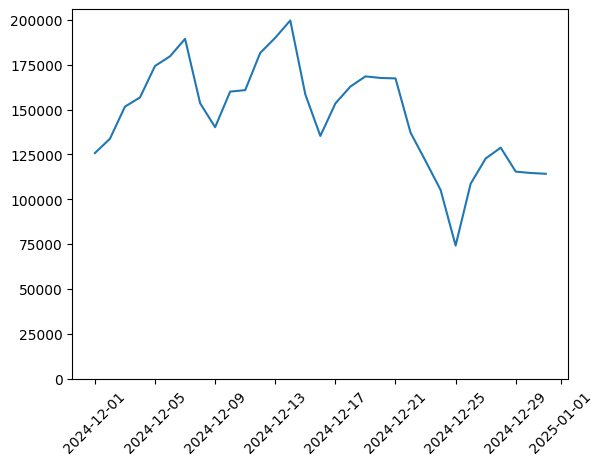

In [359]:
plt.plot(pl_taxi_grouped.select(pl.col('pickup_date')),
         pl_taxi_grouped.select(pl.col('total_passenger'))
)

plt.xticks(rotation = 45)
plt.ylim(0,)

### shift

In [877]:
print(pl_df.with_columns(
                    pl.col('total_amount').shift(1, fill_value = -999).alias('total_amount_shift')
                ).with_columns((pl.col('total_amount') - pl.col('total_amount_shift')).alias('shift_diff'),
                              pl.col('total_amount').diff(1).alias('diff')))

shape: (5, 8)
┌───────────┬─────────────┬────────────┬────────────┬────────────┬────────────┬────────────┬───────┐
│ vendor_id ┆ passenger_c ┆ trip_dista ┆ payment_ty ┆ total_amou ┆ total_amou ┆ shift_diff ┆ diff  │
│ ---       ┆ ount        ┆ nce        ┆ pe         ┆ nt         ┆ nt_shift   ┆ ---        ┆ ---   │
│ str       ┆ ---         ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ f64        ┆ f64   │
│           ┆ i64         ┆ f64        ┆ str        ┆ f64        ┆ f64        ┆            ┆       │
╞═══════════╪═════════════╪════════════╪════════════╪════════════╪════════════╪════════════╪═══════╡
│ A         ┆ 1           ┆ 0.95       ┆ card       ┆ 14.3       ┆ -999.0     ┆ 1013.3     ┆ null  │
│ A         ┆ 1           ┆ 1.2        ┆ card       ┆ 16.9       ┆ 14.3       ┆ 2.6        ┆ 2.6   │
│ B         ┆ 2           ┆ 2.51       ┆ cash       ┆ 34.6       ┆ 16.9       ┆ 17.7       ┆ 17.7  │
│ B         ┆ 2           ┆ 2.9        ┆ cash       ┆ 27.8       ┆ 34.6      

In [878]:
pl_df_shift = pl_df.with_columns(
											pl.col('total_amount').shift(1, fill_value = -999).alias('total_amount_shift_fill'),
											pl.col('total_amount').shift(1).alias('total_amount_shift')
										).select(
													pl.col(['total_amount', 'total_amount_shift_fill', 'total_amount_shift']),
													(pl.col('total_amount') - pl.col('total_amount_shift')).alias('shift_diff'),
													pl.col('total_amount').diff(1).alias('diff_method')
										)

In [880]:
print(pl_df_shift)

shape: (5, 5)
┌──────────────┬─────────────────────────┬────────────────────┬────────────┬─────────────┐
│ total_amount ┆ total_amount_shift_fill ┆ total_amount_shift ┆ shift_diff ┆ diff_method │
│ ---          ┆ ---                     ┆ ---                ┆ ---        ┆ ---         │
│ f64          ┆ f64                     ┆ f64                ┆ f64        ┆ f64         │
╞══════════════╪═════════════════════════╪════════════════════╪════════════╪═════════════╡
│ 14.3         ┆ -999.0                  ┆ null               ┆ null       ┆ null        │
│ 16.9         ┆ 14.3                    ┆ 14.3               ┆ 2.6        ┆ 2.6         │
│ 34.6         ┆ 16.9                    ┆ 16.9               ┆ 17.7       ┆ 17.7        │
│ 27.8         ┆ 34.6                    ┆ 34.6               ┆ -6.8       ┆ -6.8        │
│ 15.2         ┆ 27.8                    ┆ 27.8               ┆ -12.6      ┆ -12.6       │
└──────────────┴─────────────────────────┴────────────────────┴────────────┴

### Window function

In [363]:
orders = pl.DataFrame(
    {
        "item": ["coffe", "ade", "coffe", "cake", "chocolate", "ade", "bread"],
        "number_of_orders": [1, 3, 7, 2, 5, 4, 10]
    }
)
print(orders)

shape: (7, 2)
┌───────────┬──────────────────┐
│ item      ┆ number_of_orders │
│ ---       ┆ ---              │
│ str       ┆ i64              │
╞═══════════╪══════════════════╡
│ coffe     ┆ 1                │
│ ade       ┆ 3                │
│ coffe     ┆ 7                │
│ cake      ┆ 2                │
│ chocolate ┆ 5                │
│ ade       ┆ 4                │
│ bread     ┆ 10               │
└───────────┴──────────────────┘


In [382]:
print(orders.sort('number_of_orders', descending = True))
print(orders.select(pl.col('*').sort_by('number_of_orders', descending = True)))
print(orders.select(pl.col('*').sort_by(('item', 'number_of_orders'), descending = True)))
print(orders.select(pl.col('*').sort_by('number_of_orders', descending = True).over('item')))

shape: (7, 2)
┌───────────┬──────────────────┐
│ item      ┆ number_of_orders │
│ ---       ┆ ---              │
│ str       ┆ i64              │
╞═══════════╪══════════════════╡
│ bread     ┆ 10               │
│ coffe     ┆ 7                │
│ chocolate ┆ 5                │
│ ade       ┆ 4                │
│ ade       ┆ 3                │
│ cake      ┆ 2                │
│ coffe     ┆ 1                │
└───────────┴──────────────────┘
shape: (7, 2)
┌───────────┬──────────────────┐
│ item      ┆ number_of_orders │
│ ---       ┆ ---              │
│ str       ┆ i64              │
╞═══════════╪══════════════════╡
│ bread     ┆ 10               │
│ coffe     ┆ 7                │
│ chocolate ┆ 5                │
│ ade       ┆ 4                │
│ ade       ┆ 3                │
│ cake      ┆ 2                │
│ coffe     ┆ 1                │
└───────────┴──────────────────┘
shape: (7, 2)
┌───────────┬──────────────────┐
│ item      ┆ number_of_orders │
│ ---       ┆ ---              │
│

In [385]:
# mapping strategy
# group_to_rows / join / explode
print(orders.select(pl.col('*').sort_by('number_of_orders', descending = True).over('item', mapping_strategy = 'group_to_rows')))
print(orders.select(pl.col('*').sort_by('number_of_orders', descending = True).over('item', mapping_strategy = 'join')))
print(orders.select(pl.col('*').sort_by('number_of_orders', descending = True).over('item', mapping_strategy = 'explode')))

shape: (7, 2)
┌───────────┬──────────────────┐
│ item      ┆ number_of_orders │
│ ---       ┆ ---              │
│ str       ┆ i64              │
╞═══════════╪══════════════════╡
│ coffe     ┆ 7                │
│ ade       ┆ 4                │
│ coffe     ┆ 1                │
│ cake      ┆ 2                │
│ chocolate ┆ 5                │
│ ade       ┆ 3                │
│ bread     ┆ 10               │
└───────────┴──────────────────┘
shape: (7, 2)
┌────────────────────┬──────────────────┐
│ item               ┆ number_of_orders │
│ ---                ┆ ---              │
│ list[str]          ┆ list[i64]        │
╞════════════════════╪══════════════════╡
│ ["coffe", "coffe"] ┆ [7, 1]           │
│ ["ade", "ade"]     ┆ [4, 3]           │
│ ["coffe", "coffe"] ┆ [7, 1]           │
│ ["cake"]           ┆ [2]              │
│ ["chocolate"]      ┆ [5]              │
│ ["ade", "ade"]     ┆ [4, 3]           │
│ ["bread"]          ┆ [10]             │
└────────────────────┴─────────────────

In [397]:
# 주별로 택시에 탑승한 승객 수, 금액을 지불하기 위해 가장 많이 사용한 방식 계산
pl_taxi_filtered = pl_taxi.filter(
                                    (pl.col('tpep_pickup_datetime') >= datetime.datetime(2024, 12, 1))
                                    & (pl.col('tpep_pickup_datetime') < datetime.datetime(2025, 1, 1))
                                    & (pl.col('payment_type') != 5)
                                    & (pl.col('payment_type').is_not_null())
)

In [ ]:
pl_taxi_filtered = pl_taxi_filtered.select(pl.col('tpep_pickup_datetime', 'tpep_dropoff_datetime',
                                                   'passenger_count', 'payment_type'),
                                            pl.col('tpep_pickup_datetime').dt.weekday().alias('pickup_weekday'),
                                            pl.col('tpep_pickup_datetime').dt.week().alias('pickup_week')
                                           )

In [432]:
standard_df = pl_taxi_filtered.with_columns(pl.col('tpep_pickup_datetime').min().dt.strftime('%Y-%m-%d').over('pickup_week').alias('standard_date'))

In [437]:
print(standard_df)

shape: (3_668_337, 7)
┌──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ tpep_pickup_ ┆ tpep_dropof ┆ passenger_c ┆ payment_typ ┆ pickup_week ┆ pickup_week ┆ standard_da │
│ datetime     ┆ f_datetime  ┆ ount        ┆ e           ┆ day         ┆ ---         ┆ te          │
│ ---          ┆ ---         ┆ ---         ┆ ---         ┆ ---         ┆ i8          ┆ ---         │
│ datetime[μs] ┆ datetime[μs ┆ i64         ┆ i64         ┆ i8          ┆             ┆ str         │
│              ┆ ]           ┆             ┆             ┆             ┆             ┆             │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ 2024-12-01   ┆ 2024-12-01  ┆ 1           ┆ 1           ┆ 7           ┆ 48          ┆ 2024-12-01  │
│ 00:12:27     ┆ 00:31:12    ┆             ┆             ┆             ┆             ┆             │
│ 2024-12-01   ┆ 2024-12-01  ┆ 4           ┆ 2           ┆ 7         

In [442]:
stat_df = standard_df.group_by(['pickup_week', 'standard_date', 'pickup_weekday', 'payment_type']).agg(pl.col(['passenger_count']).sum().alias('passenger'))

In [469]:
stat_df = stat_df.with_columns(pl.col('passenger').sum().over('pickup_week').alias('week_passenger'),
                               pl.col('passenger').rank(descending = True).over('pickup_week').alias('rank'))

In [473]:
stat_df.filter(pl.col('rank') == 1).sort('standard_date')

pickup_week,standard_date,pickup_weekday,payment_type,passenger,week_passenger,rank
i8,str,i8,i64,i64,i64,f64
48,"""2024-12-01""",7,1,100330,125760,1.0
49,"""2024-12-02""",6,1,156234,1139156,1.0
50,"""2024-12-09""",6,1,166578,1190761,1.0
51,"""2024-12-16""",4,1,140348,1092236,1.0
52,"""2024-12-23""",6,1,93583,776533,1.0
1,"""2024-12-30""",1,1,85677,228899,1.0
